In [60]:
import numpy as np
import matplotlib.pyplot as plt

def randomCoordinate(low = 0, high = 1):
    """
    This function returns a random float between low and high.
    Results are sampled from a uniform distribution over the interval [low, high).
    """
    rng = high - low
    rndCoor = np.random.random() * rng
    rndCoor += low
    return rndCoor

def randomCoordinates2D(low = 0, high = 1):
    x = randomCoordinate(low, high)
    y = randomCoordinate(low, high)
    return (x, y)

class Vertex2D:
    """
    Instances of this class represent vertices of a planar graph.
    """
    def __init__(self, x, y):
        self.x = x
        self.y = y

class PlanarGraph:
    
    def __init__(self, vertices, edges):
        self.vertices = vertices
        self.edges = edges
    
    def numVertices(self):
        return len(self.vertices)
    
    def getDegrees(self):
        
        degrees = [0] * self.numVertices() # creates a list of 0s
        
        for edge in self.edges:
            i, j = edge
            degrees[i] += 1
            degrees[j] += 1
        
        return degrees
        

def createListOfRandomVertices2D(n):
    
    vertices = []
    
    for i in range(n):
        x, y = randomCoordinates2D()
        vertex = Vertex2D(x, y)
        vertices.append(vertex)
    
    return vertices

def createRandomGraph(n, p):
    vertices = createListOfRandomVertices2D(n)
    edges = []
    
    # we want to add an edge between every pair of
    # vertices with probability p
    for i in range(len(vertices)):
        for j in range(i+1, len(vertices)):
            if np.random.random() < p:
                edges.append((i, j))
    
    graph = PlanarGraph(vertices, edges)
    
    return graph

def plotGraph(graph):
    
    vertices = graph.vertices
    xCoords = [vertex.x for vertex in vertices]
    yCoords = [vertex.y for vertex in vertices]
    plt.plot(xCoords, yCoords, 'ro')
    
    edges = graph.edges
    for edge in edges:
        i, j = edge
        xCoordsOfEdge = [xCoords[i], xCoords[j]]
        yCoordsOfEdge = [yCoords[i], yCoords[j]]
        plt.plot(xCoordsOfEdge, yCoordsOfEdge)
    
    plt.show()

def plotHistogramOfDegrees(graph):
    
    degrees = graph.getDegrees()
    n = graph.numVertices()
    
    plt.hist(degrees, bins = n, range = (0, n))
    
    plt.show()


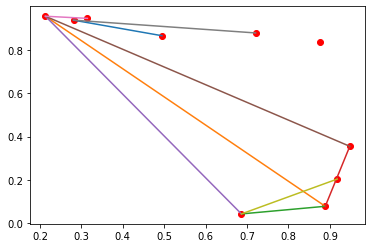

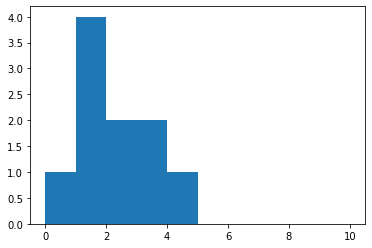

In [61]:
n = 10
p = 0.3

graph = createRandomGraph(n, p)

# for large values of n plotting the graph may become meaningless
# and it can take a long time, so it is better to comment it out
plotGraph(graph)
plotHistogramOfDegrees(graph)